## **Iris-classification-problem**

Use the "Run" button to execute the code.

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
download_url = 'https://www.kaggle.com/datasets/uciml/iris'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkumar0018
Your Kaggle Key: ··········


100%|██████████| 3.60k/3.60k [00:00<00:00, 2.03MB/s]

In [ ]:
import pandas as pd

In [ ]:
file_name = './iris/Iris.csv'

In [ ]:
df = pd.read_csv(file_name)
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Check Data Types for Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Check the object column:
- Species
- Identify the unique values

In [ ]:
df.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Check or Analyse the Null values
- There is no null values present in the data set

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Find out the Outliers
- using IQR
- using Boxplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

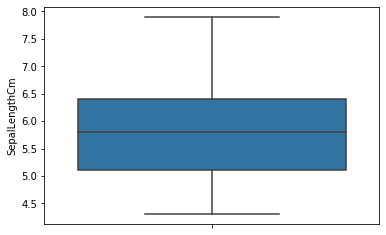

In [ ]:
sns.boxplot(y='SepalLengthCm',data=df)
plt.show()

- by looking at the above graph we can eassly says there are no outliers in the SepalLengthCm column, and its not following the Normal Distribution
- cross check once using IQR

In [ ]:
#IQR = Q3 - Q1
q1 = df.SepalLengthCm.quantile(0.25)
q3 = df.SepalLengthCm.quantile(0.75)
IQR = q3 - q1
print("IQR: ",IQR)

IQR:  1.3000000000000007


In [ ]:
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
print("Lower_bound: ",lower_bound)
print("Upper_bound: ",upper_bound)

Lower_bound:  3.1499999999999986
Upper_bound:  8.350000000000001


In [ ]:
df[(df.SepalLengthCm < lower_bound) & (df.SepalLengthCm > upper_bound)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


-  We got empty data frame, so there is outliers in the SepalLengthCm column

## Check for remaing Columns also

<AxesSubplot:ylabel='SepalWidthCm'>

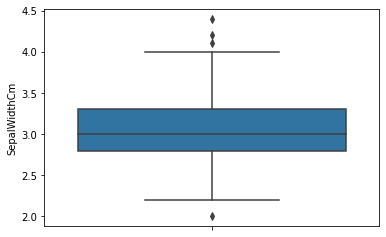

In [ ]:
sns.boxplot(y = 'SepalWidthCm',data = df)

- There are some outliers in the SepalWidthCm, it might occures based on geometrical conditions, the width of flower grown

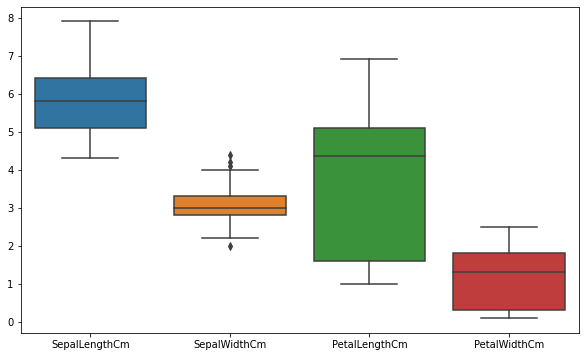

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

## Check the distribution of variables of dataset

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

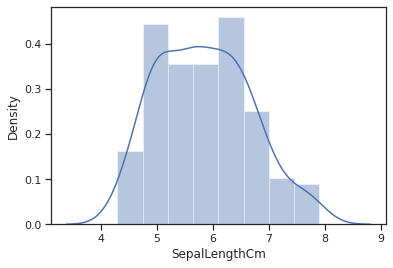

In [ ]:
sns.distplot(a=df["SepalLengthCm"], hist=True, kde=True, rug=False )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

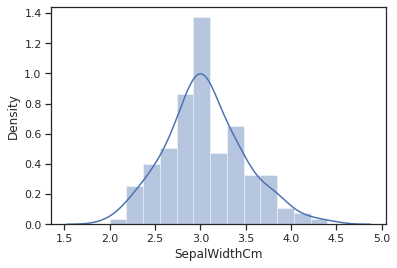

In [ ]:
sns.distplot(a=df["SepalWidthCm"], hist=True, kde=True, rug=False )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

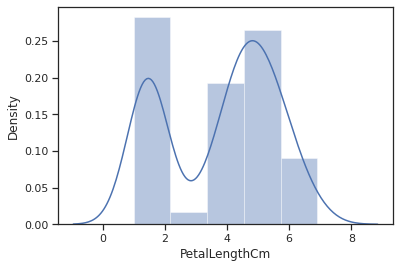

In [ ]:
sns.distplot(a=df["PetalLengthCm"], hist=True, kde=True, rug=False )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

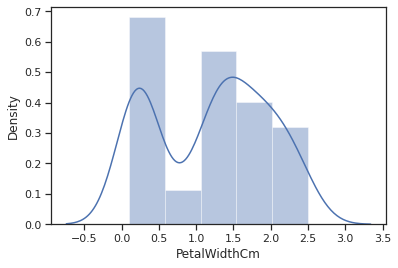

In [ ]:
sns.distplot(a=df["PetalWidthCm"], hist=True, kde=True, rug=False )

## Q - Q plot

By using QQ plot we get to know that the data following normal distribution or not

In [ ]:
import scipy.stats as stats
import pylab

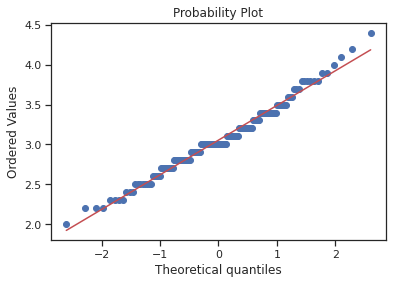

In [ ]:
stats.probplot(df.SepalWidthCm,dist='norm',plot=pylab)
pylab.show()

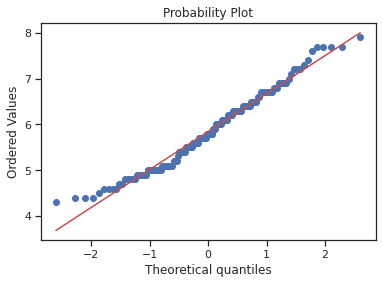

In [ ]:
stats.probplot(df.SepalLengthCm,dist='norm',plot=pylab)
pylab.show()

## Plot  the SepalWidthCm without outliers and with outliers 

In [ ]:
q1 = df.SepalWidthCm.quantile(0.25)
q3 = df.SepalWidthCm.quantile(0.75)
IQR = q3 - q1
print("IQR: ",IQR)
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
print("Lower_bound: ",lower_bound)
print("Upper_bound: ",upper_bound)

SepalWidthCm_no_outliers = df[(df.SepalWidthCm>lower_bound)&(df.SepalWidthCm<upper_bound)]
SepalWidthCm_no_outliers.SepalWidthCm

IQR:  0.5
Lower_bound:  2.05
Upper_bound:  4.05


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 146, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

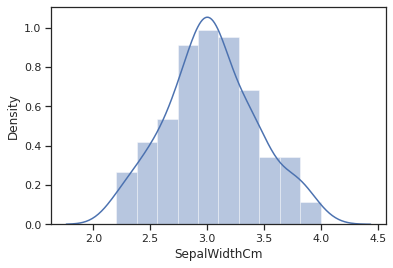

In [ ]:
sns.distplot(a=SepalWidthCm_no_outliers.SepalWidthCm, hist=True, kde=True, rug=False )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

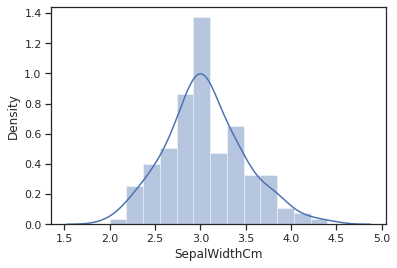

In [ ]:
sns.distplot(a=df["SepalWidthCm"], hist=True, kde=True, rug=False )

- In the above Scenario, t-distribution has fatter tails and is more spread out than the normal distribution, which means that the curve is further away from the x-axis. As df increases, the t-distribution becomes closer to the normal distribution and the curve becomes closer to touching the x-axis.

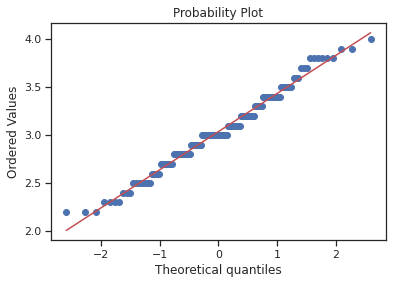

In [ ]:
stats.probplot(SepalWidthCm_no_outliers.SepalWidthCm,dist='norm',plot=pylab)
pylab.show()


## Correlation

In [ ]:
corr_matrix = df.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

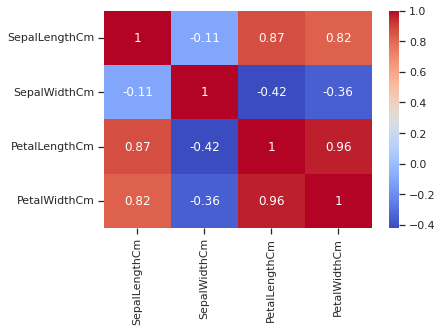

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

- We can see that there is a strong positive correlation between petal length and petal width, while there is a weak negative correlation between sepal width and petal length.